In [1]:
import pandas as pd
import emoji
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_one = pd.read_csv('datasets/Step_one.csv')
df_two = pd.read_csv('datasets/Step_two.csv')
df_three = pd.read_csv('datasets/Step_three.csv')

print(df_one.info()) #29934
print(df_two.info()) #24702
print(df_three.info()) #22742

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29934 entries, 0 to 29933
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  29934 non-null  object
 1   user_id     29934 non-null  int64 
 2   username    29934 non-null  object
 3   tweet       29934 non-null  object
 4   place       3638 non-null   object
 5   near        29934 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  24702 non-null  object 
 1   user_id     24702 non-null  int64  
 2   username    24702 non-null  object 
 3   tweet       24702 non-null  object 
 4   place       7069 non-null   object 
 5   near        24702 non-null  object 
 6   id          2088 non-null   float64
dtypes: float64(1), int64(1), object(5)


In [3]:
#merge all the datasets
all_df=[df_one, df_two, df_three]
all_df=pd.concat(all_df)
all_df = all_df.reset_index(drop=True)
print(len(all_df))
empty_tweet=all_df['tweet'].isna().value_counts()
print(empty_tweet) #no empty tweets

77378
tweet
False    77378
Name: count, dtype: int64


In [ ]:
all_df['clean_tweet']= all_df['tweet'].copy()
# Drop 'id' column if it exists; ignore otherwise to avoid KeyError
all_df = all_df.drop(columns=['id'], errors='ignore')
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,UK Parliament: 2nd Covid Vaccine should be 21 ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,First dose of vaccination 💉 5/1/2021..to comba...
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,"Time to forget about #COVID, #Brexit and #Trum..."
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,@doctor_oxford Rachel you absolutely nailed it...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,My kids can never say they don’t wanna do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",Very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",#BREAKING Health Secretary Matt Hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",“Hundreds of flights full of Indian corona” co...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",Sadiq Khan asks for vaccine blitz in variant-h...


In [64]:
#handle emoji
def convert_emoji(text):
    text=[emoji.demojize(tw) for tw in text]  #run slowly
    new_df= pd.DataFrame(text, columns=['tweet'])
    return new_df
new_df=convert_emoji(all_df['clean_tweet'])
new_df

,tweet
0,parliament days not weeks challenge government...
1,first dose syringe combating
2,time forget sleep listening abcgrandstand via ...
3,rachel absolutely nailed tonight throughout pr...
4,kids never say not wana homework got sparkles ...
...,...
77260,little interest politicians media well china e...
77261,breaking health secretary matt hancock announc...
77262,hundreds flights full indian corona comes acro...
77263,sadiq khan asks blitz hit boroughs


In [ ]:
all_df[['clean_tweet']]=new_df[['tweet']].copy()  
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament days not weeks challenge government...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose syringe combating
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget sleep listening abcgrandstand via ...
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say not wana homework got sparkles ...
...,...,...,...,...,...,...,...
77260,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",little interest politicians media well china e...
77261,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
77262,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights full indian corona comes acro...
77263,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks blitz hit boroughs


In [80]:
#simple data cleaning
#reference:https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Analysis%20of%20Twitter.ipynb
def preprocessing_one(df):
    #lower all characters
    df['clean_tweet'] = df['clean_tweet'].str.lower()
    #remove all the mentions: @username
    df['clean_tweet'] = df['clean_tweet'].replace(r'@\w+', '', regex=True)
    #remove all the links in the original tweets (start with "www" and "http")
    df['clean_tweet'] = df['clean_tweet'].replace(r'http\S+|rhttps\S+|rwww\S+', '', regex=True)   
    return df
#Notice: Remove punctuation and special characters after handling contraction words
preprocessing_one(all_df)

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament days not weeks challenge government...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose syringe combating
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget sleep listening abcgrandstand via ...
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say not wana homework got sparkles ...
...,...,...,...,...,...,...,...
77260,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",little interest politicians media well china e...
77261,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
77262,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights full indian corona comes acro...
77263,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks blitz hit boroughs


In [81]:
#Handling repeated characters
#reference: https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Analysis%20of%20Twitter.ipynb
#https://stackoverflow.com/questions/3788870/how-to-check-if-a-word-is-an-english-word-with-python
from nltk.corpus import wordnet
# re.sub(pattern, repl, string, count): pattern(Eligible pattern)，repl(replace to...), string
def repeated_char(word):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    repl_word = r'\1\2\3'
    if wordnet.synsets(word):
        return word  #test for words existence
    #repl_new= repeat_pattern.sub(repl_word, word)
    repl_new = re.sub(repeat_pattern, repl_word, word)
    if repl_new != word:
        return repeated_char(repl_new)
    else:
        return repl_new
word1='loooove'
print(repeated_char(word1))

love


In [82]:
def check_repeated (tweet):
    repeat_pattern = r'(\w*)(\w+)(\2)(\w*)'
    word_set = [''.join(i) for i in re.findall(repeat_pattern, tweet)]  #find all the words with repeated characters
    for word in word_set:
        if not wordnet.synsets(word):
            tweet=re.sub(word, repeated_char(word), tweet)
    return tweet
#test the function
tweet1='I looove you, soooo much'
print(check_repeated (tweet1))

I love you, so much


In [83]:
#replace words contraction
#reference:https://github.com/kiran-bal/Disaster_tweets_classifier/blob/2e6d648f5ef9cbe67024ad5cf032582fc4dc3a75/version2/notebooks/Disaster_tweet_classifier.ipynb
#re.sub(pattern, repl, string, count=0, flags=0): count=0: all matched will be replaced
# Use raw strings for patterns and replacement backreferences to avoid invalid escape warnings
contraction_dict = [
    (r"I\'m", 'I am'), (r"i\'m", 'i am'), (r"ain\'t", 'am not'),
    (r"(\w+)\'s", r"\g<1> is"), (r"(\w+)\'re", r"\g<1> are"), (r"(\w+)n\'t", r"\g<1> not"),
    (r"can\'t", 'cannot'), (r"won\'t", 'will not'), (r"wont", 'will not'),
    (r"(\w+)\'ll", r"\g<1> will"), (r"(\w+)\'d", r"\g<1> would"), (r"(\w+)\'ve", r"\g<1> have"),
    # Right single quotation mark variants
    (r"I\’m", 'I am'), (r"i\’m", 'i am'), (r"ain\’t", 'am not'),
    (r"(\w+)\’s", r"\g<1> is"), (r"(\w+)\’re", r"\g<1> are"), (r"(\w+)n\’t", r"\g<1> not"),
    (r"can\’t", 'cannot'), (r"won\’t", 'will not'), (r"(\w+)\’ll", r"\g<1> will"), (r"(\w+)\’d", r"\g<1> would"), (r"(\w+)\’ve", r"\g<1> have")
]
#Notice: The quotation of some texts are not in English

def handle_contraction(text):
    patterns_set = [(re.compile(pattern), repl) for (pattern, repl) in contraction_dict]
    for (pattern, repl) in patterns_set:
        text = re.sub(pattern, repl, text)
    return text
#test
print(all_df['clean_tweet'][4])
print(handle_contraction(all_df['clean_tweet'][4]))

kids never say not wana homework got sparkles sparkles still banging word essay no excuse
kids never say not wana homework got sparkles sparkles still banging word essay no excuse


In [84]:
def preprocessing_two(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: check_repeated(x)) #remove repeated charaters
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: handle_contraction(x)) #handle constraction
    return df
all_df=preprocessing_two(all_df)
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament days not weeks challenge government...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose syringe combating
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget sleep listening abcgrandstand via ...
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say not wana homework got sparkles ...
...,...,...,...,...,...,...,...
77260,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",little interest politicians media well china e...
77261,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
77262,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights full indian corona comes acro...
77263,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks blitz hit boroughs


In [85]:
#only English character
def replace_non_alphabetical(df):
    df['clean_tweet'] = df['clean_tweet'].replace(r'[^a-zA-Z]', ' ', regex=True)
    df['clean_tweet'] = df['clean_tweet'].replace(r'\s+', ' ', regex=True)
    return df
all_df = replace_non_alphabetical(all_df)
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament days not weeks challenge government...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose syringe combating
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget sleep listening abcgrandstand via ...
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say not wana homework got sparkles ...
...,...,...,...,...,...,...,...
77260,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",little interest politicians media well china e...
77261,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
77262,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights full indian corona comes acro...
77263,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks blitz hit boroughs


In [86]:
#remove less than two-character words, but keep "no" if len(w)>2 or w=="no"
def short_words(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or w=="no"]))
    return df
all_df=short_words(all_df)
all_df.head()

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament days not weeks challenge government...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose syringe combating
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget sleep listening abcgrandstand via ...
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say not wana homework got sparkles ...


In [87]:
#remove stopwords
#can't remove words like "not" or "no"

In [88]:
#create own stopwords
my_stopwords = [x for x in open('stopwords.txt','r', encoding="utf-8").read().split('\n')]
print(my_stopwords)

def remove_stopwords(df):
    df['clean_tweet']=df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in my_stopwords]))
    return df
all_df=remove_stopwords(all_df)
all_df
all_df.to_csv('clean_datasets/all_clean_1_test.csv',index = False, encoding='utf_8_sig')

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'could', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', 'has', 'hasn', 'have', 'haven', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'might', 'more', 'most', 'mustn', 'my', 'myself', 'needn', 'nope', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 'same', 'shan', 'she', 'should', 'shouldn', 'so', 'some', 'such', 't', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', 'wasn', 'we', 'wer

In [89]:
#remove empty tweets
def remove_empty(df):
    # Ensure NaNs are treated as empty
    df = df[df['clean_tweet'].fillna('') != '']
    return df
all_df = remove_empty(all_df)
all_df = all_df.reset_index(drop=True)
# Drop 'id' column if present; ignore otherwise to avoid KeyError
all_df = all_df.drop(columns=['id'], errors='ignore')
all_df
all_df.to_csv('clean_datasets/all_clean_1.csv', index=False, encoding='utf_8_sig')

In [90]:
#split the clean datasets into three steps
all_df.to_csv('clean_datasets/all_clean_1.csv',index = False, encoding='utf_8_sig')

In [100]:
clean_df = pd.read_csv('clean_datasets/all_clean_1.csv')
clean_df['created_at'] = clean_df['created_at'].str.extract(r'(^\d{4}[-/]\d{2}[-/]\d{2})')
clean_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament days not weeks challenge government...
1,2021-01-06,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose syringe combating
2,2021-01-06,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget sleep listening abcgrandstand via ...
3,2021-01-06,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...
4,2021-01-06,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say not wana homework got sparkles ...
...,...,...,...,...,...,...,...
77260,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",little interest politicians media well china e...
77261,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
77262,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights full indian corona comes acro...
77263,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks blitz hit boroughs


In [101]:
clean_df['created_at'] = pd.to_datetime(clean_df['created_at'] , utc=True).dt.date
clean_df.to_csv('clean_datasets/all_clean_1.csv',index = False, encoding='utf_8_sig')
clean_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament days not weeks challenge government...
1,2021-01-06,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose syringe combating
2,2021-01-06,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget sleep listening abcgrandstand via ...
3,2021-01-06,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...
4,2021-01-06,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say not wana homework got sparkles ...
...,...,...,...,...,...,...,...
77260,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",little interest politicians media well china e...
77261,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
77262,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights full indian corona comes acro...
77263,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks blitz hit boroughs


In [102]:
import datetime
clean_step_one = clean_df[(clean_df['created_at']) < datetime.date(2021,3,8)].reset_index(drop=True)
print("step_one:",len(clean_step_one))

step_one: 29882


In [103]:
clean_step_two = clean_df[((clean_df['created_at']) >= datetime.date(2021,3,8)) & ((clean_df['created_at']) < datetime.date(2021,5,17))].reset_index(drop=True)
print("step_two:",len(clean_step_two))
# clean_step_two

step_two: 24663


In [104]:
clean_step_three= clean_df[((clean_df['created_at']) >= datetime.date(2021,5,17)) & ((clean_df['created_at']) <= datetime.date(2021,7,18))].reset_index(drop=True)
print("step_three:",len(clean_step_three))
# clean_step_three

step_three: 22700


In [105]:
#save as csv
clean_step_one.to_csv('clean_datasets/clean_step1.csv',index = False, encoding='utf_8_sig')
clean_step_two.to_csv('clean_datasets/clean_step2.csv',index = False, encoding='utf_8_sig')
clean_step_three.to_csv('clean_datasets/clean_step3.csv',index = False, encoding='utf_8_sig')

In [106]:
len(clean_step_one)+len(clean_step_two)+len(clean_step_three)

77245

In [ ]:
clean_all=[clean_step_one,clean_step_two,clean_step_three]
clean_all=pd.concat(clean_all)
clean_all_dfs=clean_all.reset_index(drop=True)
# new_dfs.to_csv("unsupervised_datasets/lexicon_all.csv")
clean_all.to_csv('clean_datasets/clean_all.csv',index = False, encoding='utf_8_sig') #final clean datasets
clean_all

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament days not weeks challenge government...
1,2021-01-06,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose syringe combating
2,2021-01-06,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget sleep listening abcgrandstand via ...
3,2021-01-06,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...
4,2021-01-06,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say not wana homework got sparkles ...
...,...,...,...,...,...,...,...
22695,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",little interest politicians media well china e...
22696,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
22697,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights full indian corona comes acro...
22698,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks blitz hit boroughs


In [108]:
#The number of tweets collected in each city
#London
London_df = clean_all[clean_all['near'].str.contains('London|london')]
London_df = London_df.reset_index(drop=True)
print("Total tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_all[clean_all['near'].str.contains('Birmingham|birmingham')]
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Total tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_all[clean_all['near'].str.contains('Bristol|Bristol')]
Bristol_df = Bristol_df.reset_index(drop=True)
print("Total tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_all[clean_all['near'].str.contains('Leeds|leeds')]
Leeds_df = Leeds_df.reset_index(drop=True)
print("Total tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_all[clean_all['near'].str.contains('Liverpool|liverpool')]
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Total tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_all[clean_all['near'].str.contains('Manchester|manchester')]
Manchester_df = Manchester_df.reset_index(drop=True)
print("Total tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_all[clean_all['near'].str.contains('Newcastle|newcastle')]
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Total tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_all[clean_all['near'].str.contains('Nottingham|nottingham')]
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Total tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_all[clean_all['near'].str.contains('Sheffield|sheffield')]
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Total tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_all[clean_all['near'].str.contains('Southampton|southampton')]
Southampton_df = Southampton_df.reset_index(drop=True)
print("Total tweets in Southampton:",len(Southampton_df))
print(len(London_df)+len(Birmingham_df)+len(Bristol_df)+len(Leeds_df)+len(Liverpool_df)+len(Manchester_df)+len(Newcastle_df)+len(Nottingham_df)+len(Sheffield_df)+len(Southampton_df))

Total tweets in London: 37639
Total tweets in Birmingham: 6694
Total tweets in Bristol: 3760
Total tweets in Leeds: 4233
Total tweets in Liverpool: 5521
Total tweets in Manchester: 9178
Total tweets in Newcastle: 853
Total tweets in Nottingham: 2994
Total tweets in Sheffield: 3716
Total tweets in Southampton: 2654
77242


In [109]:
cities = {"city": ["London", "Manchester", "Birmingham", "Liverpool", "Leeds", "Bristol", "Sheffield", "Nottingham","Southampton", "Newcastle"],
           "total number":[len(London_df),  len(Manchester_df), len(Birmingham_df), len(Liverpool_df), len(Leeds_df), len(Bristol_df), len(Sheffield_df),len(Nottingham_df),len(Southampton_df), len(Newcastle_df)]}
city_frame  = pd.DataFrame(data = cities)
city_frame.to_csv('Drawing/all_cities.csv',index = False)
city_frame

,city,total number
0,London,37639
1,Manchester,9178
2,Birmingham,6694
3,Liverpool,5521
4,Leeds,4233
5,Bristol,3760
6,Sheffield,3716
7,Nottingham,2994
8,Southampton,2654
9,Newcastle,853


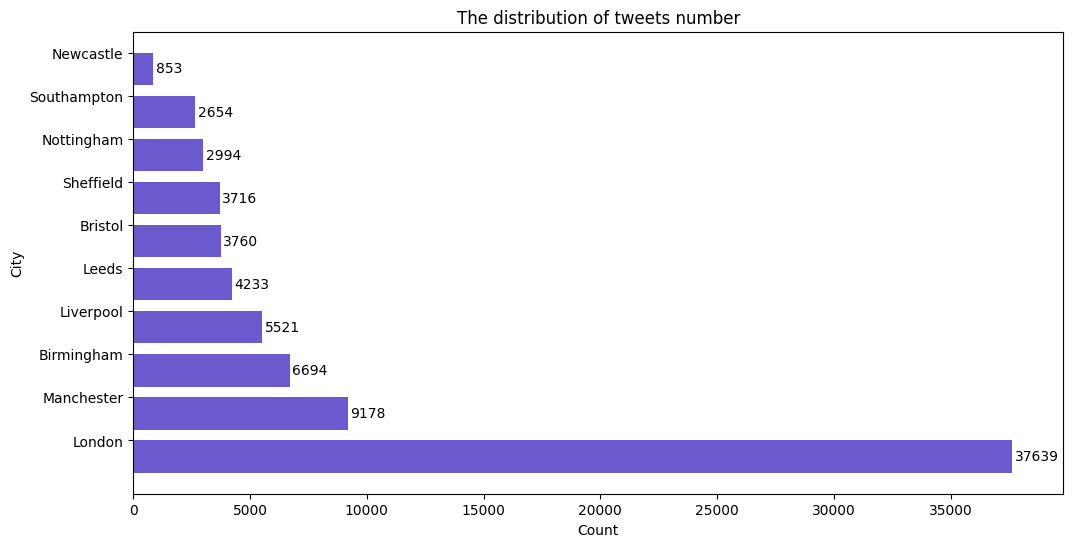

In [110]:
#reference: https://stackoverflow.com/questions/60212294/how-to-add-labels-to-a-horizontal-bar-chart-in-matplotlib
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()   

width = 0.75 # bar's width 
x_loc = np.arange(len(city_frame['total number']))  # the x locations
ax.barh(x_loc, city_frame['total number'], width, color="slateblue")
ax.set_yticks(x_loc+width/2)
ax.set_yticklabels(city_frame['city'], minor=False)

_, xmax = plt.xlim()
plt.xlim(0, xmax+300)
for i, v in enumerate(city_frame['total number']):
    ax.text(v + 100, i, str(v), color='black', fontsize=10, ha='left', va='center')
    
plt.title('The distribution of tweets number')
plt.xlabel('Count')
plt.ylabel('City')

# plt.show()
plt.savefig("visualizations/tweets distribution")

In [111]:
#The number of tweets collected in each city
#step 1
#London
London_df = clean_step_one[clean_step_one['near'].str.contains('London|london')]
London_df = London_df.reset_index(drop=True)
print("Step1 tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_step_one[clean_step_one['near'].str.contains('Birmingham|birmingham')]
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Step1 tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_step_one[clean_step_one['near'].str.contains('Bristol|Bristol')]
Bristol_df = Bristol_df.reset_index(drop=True)
print("Step1 tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_step_one[clean_step_one['near'].str.contains('Leeds|leeds')]
Leeds_df = Leeds_df.reset_index(drop=True)
print("Step1 tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_step_one[clean_step_one['near'].str.contains('Liverpool|liverpool')]
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Step1 tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_step_one[clean_step_one['near'].str.contains('Manchester|manchester')]
Manchester_df = Manchester_df.reset_index(drop=True)
print("Step1 tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_step_one[clean_step_one['near'].str.contains('Newcastle|newcastle')]
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Step1 tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_step_one[clean_step_one['near'].str.contains('Nottingham|nottingham')]
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Step1 tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_step_one[clean_step_one['near'].str.contains('Sheffield|sheffield')]
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Step1 tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_step_one[clean_step_one['near'].str.contains('Southampton|southampton')]
Southampton_df = Southampton_df.reset_index(drop=True)
print("Step1 tweets in Southampton:",len(Southampton_df))

Step1 tweets in London: 12847
Step1 tweets in Birmingham: 3004
Step1 tweets in Bristol: 1570
Step1 tweets in Leeds: 1853
Step1 tweets in Liverpool: 2369
Step1 tweets in Manchester: 3790
Step1 tweets in Newcastle: 240
Step1 tweets in Nottingham: 1316
Step1 tweets in Sheffield: 1603
Step1 tweets in Southampton: 1288


In [112]:
#step 2
#The number of tweets collected in each city
#London
London_df = clean_step_two[clean_step_two['near'].str.contains('London|london')]
London_df = London_df.reset_index(drop=True)
print("Step2 tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_step_two[clean_step_two['near'].str.contains('Birmingham|birmingham')]
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Step2 tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_step_two[clean_step_two['near'].str.contains('Bristol|Bristol')]
Bristol_df = Bristol_df.reset_index(drop=True)
print("Step2 tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_step_two[clean_step_two['near'].str.contains('Leeds|leeds')]
Leeds_df = Leeds_df.reset_index(drop=True)
print("Step2 tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_step_two[clean_step_two['near'].str.contains('Liverpool|liverpool')]
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Step2 tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_step_two[clean_step_two['near'].str.contains('Manchester|manchester')]
Manchester_df = Manchester_df.reset_index(drop=True)
print("Step2 tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_step_two[clean_step_two['near'].str.contains('Newcastle|newcastle')]
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Step2 tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_step_two[clean_step_two['near'].str.contains('Nottingham|nottingham')]
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Step2 tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_step_two[clean_step_two['near'].str.contains('Sheffield|sheffield')]
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Step2 tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_step_two[clean_step_two['near'].str.contains('Southampton|southampton')]
Southampton_df = Southampton_df.reset_index(drop=True)
print("Step2 tweets in Southampton:",len(Southampton_df))

Step2 tweets in London: 12934
Step2 tweets in Birmingham: 1902
Step2 tweets in Bristol: 1003
Step2 tweets in Leeds: 1214
Step2 tweets in Liverpool: 1646
Step2 tweets in Manchester: 2833
Step2 tweets in Newcastle: 249
Step2 tweets in Nottingham: 943
Step2 tweets in Sheffield: 1183
Step2 tweets in Southampton: 755


In [113]:
#step 3
#The number of tweets collected in each city
#London
London_df = clean_step_three[clean_step_three['near'].str.contains('London|london')]
London_df = London_df.reset_index(drop=True)
print("Step3 tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_step_three[clean_step_three['near'].str.contains('Birmingham|birmingham')]
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Step3 tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_step_three[clean_step_three['near'].str.contains('Bristol|Bristol')]
Bristol_df = Bristol_df.reset_index(drop=True)
print("Step3 tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_step_three[clean_step_three['near'].str.contains('Leeds|leeds')]
Leeds_df = Leeds_df.reset_index(drop=True)
print("Step3 tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_step_three[clean_step_three['near'].str.contains('Liverpool|liverpool')]
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Step3 tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_step_three[clean_step_three['near'].str.contains('Manchester|manchester')]
Manchester_df = Manchester_df.reset_index(drop=True)
print("Step3 tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_step_three[clean_step_three['near'].str.contains('Newcastle|newcastle')]
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Step3 tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_step_three[clean_step_three['near'].str.contains('Nottingham|nottingham')]
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Step3 tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_step_three[clean_step_three['near'].str.contains('Sheffield|sheffield')]
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Step3 tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_step_three[clean_step_three['near'].str.contains('Southampton|southampton')]
Southampton_df = Southampton_df.reset_index(drop=True)
print("Step3 tweets in Southampton:",len(Southampton_df))

Step3 tweets in London: 11858
Step3 tweets in Birmingham: 1788
Step3 tweets in Bristol: 1187
Step3 tweets in Leeds: 1166
Step3 tweets in Liverpool: 1506
Step3 tweets in Manchester: 2555
Step3 tweets in Newcastle: 364
Step3 tweets in Nottingham: 735
Step3 tweets in Sheffield: 930
Step3 tweets in Southampton: 611


In [114]:
#stack bar chart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
    
Steps_df = pd.DataFrame([['Stage1', 12870, 3010, 1572, 1857, 2372, 3796, 239, 1315, 1604, 1287], 
                   ['Stage2', 12945, 1905, 1003, 1214, 1652, 2838, 249, 942, 1185, 755], 
                   ['Stage3', 11863, 1793, 1187, 1170, 1506, 2559, 364, 735, 931, 612]],
                  columns=['Stages', 'London','Birmingham','Bristol','Leeds','Liverpool','Manchester','Newcastle','Nottingham','Sheffield','Southampton'])
Steps_df.to_csv('visualizations/Drawing/three_steps_cities.csv',index = False, encoding='utf_8_sig')
Steps_df

,Stages,London,Birmingham,Bristol,Leeds,Liverpool,Manchester,Newcastle,Nottingham,Sheffield,Southampton
0,Stage1,12870,3010,1572,1857,2372,3796,239,1315,1604,1287
1,Stage2,12945,1905,1003,1214,1652,2838,249,942,1185,755
2,Stage3,11863,1793,1187,1170,1506,2559,364,735,931,612


(array([0, 1, 2]),
 [Text(0, 0, 'Stage1'), Text(1, 0, 'Stage2'), Text(2, 0, 'Stage3')])

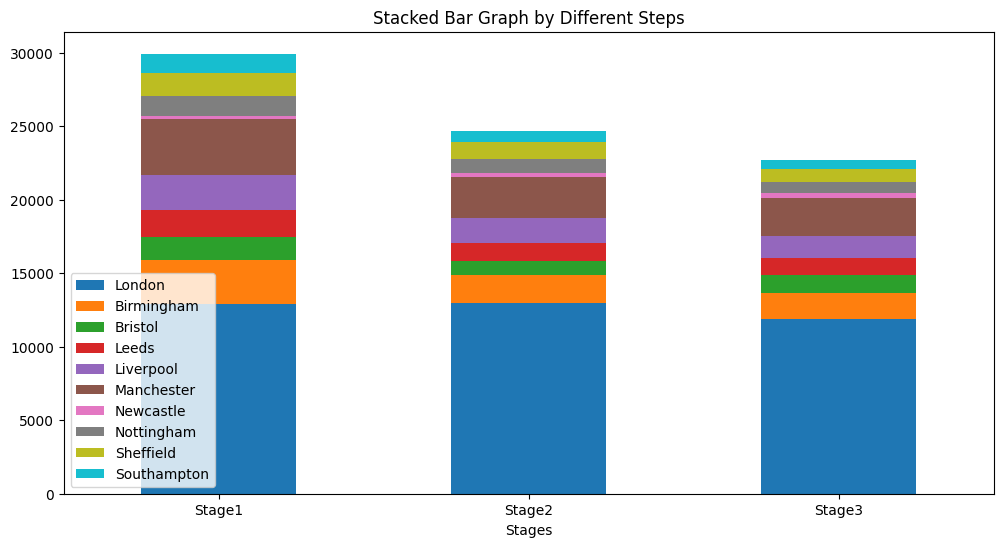

In [115]:
# plt.xticks(rotation=0, ha='center')
Steps_df.plot(x='Stages', kind='bar', stacked=True,
        title='Stacked Bar Graph by Different Steps')
plt.xticks(rotation=0, ha='center')

In [117]:
# Audit stopwords that still appear in clean_tweet using NLTK and scikit-learn
import pandas as pd
import re
from collections import Counter

# Ensure we have the latest cleaned data loaded
try:
    df = pd.read_csv('clean_datasets/all_clean_1.csv')
except Exception:
    # Fallback to the in-memory DataFrame if available
    df = clean_df if 'clean_df' in globals() else all_df

# Load NLTK stopwords safely
import nltk
try:
    from nltk.corpus import stopwords as nltk_stop
    _ = nltk_stop.words('english')
except LookupError:
    nltk.download('stopwords')
    from nltk.corpus import stopwords as nltk_stop

nltk_sw = set(nltk_stop.words('english'))

# Load scikit-learn English stopwords
try:
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_sw
except Exception:
    sklearn_sw = set()

# Load custom stopwords.txt if present
try:
    custom_sw = set([x.strip() for x in open('stopwords.txt','r', encoding='utf-8').read().split('\n') if x.strip()])
except FileNotFoundError:
    custom_sw = set()

# Union of stopwords sources, but explicitly keep negations and sentiment-relevant words
negations_keep = {"no", "not", "nor", "never", "n't"}
combined_sw = (nltk_sw | set(sklearn_sw) | custom_sw) - negations_keep

# Simple tokenizer: split on non-letters; lowercase
def simple_tokenize(text: str):
    if not isinstance(text, str):
        return []
    return [t for t in re.split(r"[^a-zA-Z]+", text.lower()) if t]

# Find tokens in clean_tweet that are in combined stopwords
stopword_hits = []
for txt in df.get('clean_tweet', []):
    toks = simple_tokenize(txt)
    hits = [t for t in toks if t in combined_sw]
    stopword_hits.extend(hits)

# Frequency count
freq = Counter(stopword_hits)

# Prepare a DataFrame of results
results_df = pd.DataFrame(
    [(w, c,
      int(w in nltk_sw),
      int(w in sklearn_sw),
      int(w in custom_sw))
     for w, c in freq.most_common()],
    columns=['stopword', 'count', 'in_nltk', 'in_sklearn', 'in_custom']
)

# Show top 100 stopwords that remain
print("Top remaining stopwords in clean_tweet (excluding negations):")
print(results_df.head(100))

# Save full list for review
results_df.to_csv('clean_datasets/stopwords_remaining_audit.csv', index=False, encoding='utf_8_sig')
print("Saved audit to clean_datasets/stopwords_remaining_audit.csv with", len(results_df), "unique stopwords.")

Top remaining stopwords in clean_tweet (excluding negations):
      stopword  count  in_nltk  in_sklearn  in_custom
0          get   6294        0           1          0
1        would   5088        0           1          0
2          one   4881        0           1          0
3        still   3432        0           1          0
4        first   3419        0           1          0
..         ...    ...      ...         ...        ...
95     towards    192        0           1          0
96  everywhere    171        0           1          0
97   otherwise    167        0           1          0
98        five    163        0           1          0
99       often    160        0           1          0

[100 rows x 5 columns]
Saved audit to clean_datasets/stopwords_remaining_audit.csv with 178 unique stopwords.
